In [1]:
import extFunc as ext
import matplotlib.pyplot as plt
import numpy as np
from importlib import import_module
import pandas as pd 
import cobra
import optlang
import copy 
import random

In [2]:
#Load Models if not already in RAM

#nameList = ['iJN1462_GLC_UR10_9.xml' , 'iJN1462_GLC_UR6_3.xml', 'iJN1462_GLN_UR5_1.xml', 'iJN1462_GLC_UR7_3.xml' , 'iJN1462_OCT_UR3_4.xml']
#nameList = ['iJN1462_GLC_UR6_3.xml' , 'iJN1462_OCT_UR3_4.xml']
nameList = ['iJN1462_OCT_UR3_4.xml']

if 'modelDict' not in locals():
    modelDict = ext.ImportFunction(nameList)



if 'glc_oct_comp'  not in locals():
    glc_oct_comp = ext.ModelComparison(modelDict=modelDict)

#import extFunc as ext


#a.keys()
#a['secretion'].sort_values('flux', ascending=True).iloc[0:5].reset_index(drop=True)

#glc_oct_comp.multiModellSummary(sortKrit='flux')


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [3]:

model = modelDict['iJN1462_OCT_UR3_4']


In [4]:
# to qualify internal flux variability a graphical representation needs to be 
b = model.optimize()
fluxes = b.fluxes


In [5]:

model = modelDict['iJN1462_OCT_UR3_4']
fl = model.optimize().fluxes
fv = cobra.flux_analysis.flux_variability_analysis(model)

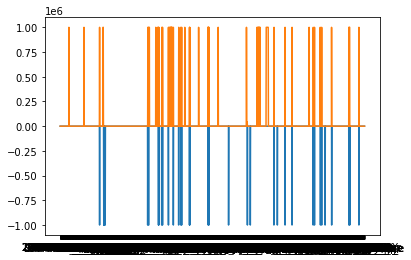

In [6]:
#from operator import attrgetter
#model.
plt.plot(fv)

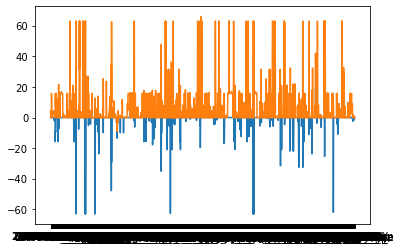

In [7]:
fv = fv[ abs(fv.maximum)  <    100 ]    #   2784
fv = fv[ abs(fv.minimum)  <    100 ] 
#fv = fv[fv.minimum < 99] 
plt.plot(fv)

In [8]:
bound_model = copy.deepcopy(model)

for reaction in model.reactions:
    if abs(reaction.lower_bound)>100:
        reaction.lower_bound= -100
    if abs(reaction.upper_bound)>100:
        reaction.upper_bound=100